+ `:(...)` 一般作用于单句statement。作用于多句时, 所得得`Expr`的`head`才为`block`
+ `quote...end` 一般作用于多句statements, 也作用于单句statement, `head`均为`block`
+ 对`block`执行`eval`时, 就是逐行执行`block`中的 *简易表达式 (类似statement)*<br><br>

+ `:(...)` : 作用于单句时out显示为`:(...)`, 其他情况out为`quote...end` 
+ `quote...end`: out都显示为`quote...end`
+ out `quote...end` 中, 除了增加linenums, 与语句statement字符串一样, 只是被[simply parsed](https://riptutorial.com/julia-lang/topic/1945/metaprogramming)<br><br>

+ `:(...)` 与 `quote...end` 基本上等价
+ 多句写成多行时，`:(...)`需要用`begin...end`包裹代码, `quote...end`不需要
+ 多句写成单行时，`:(...)`也不需要`begin...end`

In [51]:
a=1
colon_ex = :(a + 1)
colon_ex |> display
dump(colon_ex)

:(a + 1)

Expr
  head: Symbol call
  args: Array{Any}((3,))
    1: Symbol +
    2: Symbol a
    3: Int64 1


In [8]:
quote_end_ex = quote a + 1 end
quote_end_ex |> display
quote_end_ex |> typeof |> display

quote
    #= e:\Projects.jl\Training.jl\9. Expr\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W0sZmlsZQ==.jl:1 =#
    a + 1
end

Expr

In [3]:
dump(quote_end_ex)

Expr
  head: Symbol block
  args: Array{Any}((2,))
    1: LineNumberNode
      line: Int64 1
      file: Symbol e:\Projects.jl\Training.jl\9. Expr\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W0sZmlsZQ==.jl
    2: Expr
      head: Symbol call
      args: Array{Any}((3,))
        1: Symbol +
        2: Symbol a
        3: Int64 1


In [6]:
@show colon_ex == quote_end_ex
@show eval(colon_ex) == eval(quote_end_ex)
nothing

colon_ex == quote_end_ex = false
eval(colon_ex) == eval(quote_end_ex) = true


In [25]:
Meta.show_sexpr(colon_ex)
println("\n")
Meta.show_sexpr(quote_end_ex)

(:call, :+, :a, 1)

(:block,
  :(#= e:\Projects.jl\Training.jl\9. Expr\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W0sZmlsZQ==.jl:1 =#),
  (:call, :+, :a, 1)
)

In [20]:
using TreeView

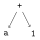

In [21]:
TreeView.walk_tree(colon_ex)

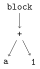

In [28]:
TreeView.walk_tree(Base.remove_linenums!(quote_end_ex))

In [13]:
colon_statements_ex = :(a=1; b=1+1; c=3; d= a+b*c+1;)

quote
    a = 1
    #= e:\Projects.jl\Training.jl\9. Expr\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W6sZmlsZQ==.jl:1 =#
    b = 1 + 1
    #= e:\Projects.jl\Training.jl\9. Expr\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W6sZmlsZQ==.jl:1 =#
    c = 3
    #= e:\Projects.jl\Training.jl\9. Expr\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W6sZmlsZQ==.jl:1 =#
    d = a + b * c + 1
end

In [39]:
quote_end_statements_ex = quote a=1; b=1+1; c=3; d= a+b*c+1;end

quote
    #= e:\Projects.jl\Training.jl\9. Expr\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W5sZmlsZQ==.jl:1 =#
    a = 1
    #= e:\Projects.jl\Training.jl\9. Expr\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W5sZmlsZQ==.jl:1 =#
    b = 1 + 1
    #= e:\Projects.jl\Training.jl\9. Expr\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W5sZmlsZQ==.jl:1 =#
    c = 3
    #= e:\Projects.jl\Training.jl\9. Expr\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W5sZmlsZQ==.jl:1 =#
    d = a + b * c + 1
end

In [40]:
quote_end_statements_ex2 = quote 
    a=1
    b=1+1
    c=3
    d= a+b*c+1
end

quote
    #= e:\Projects.jl\Training.jl\9. Expr\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X16sZmlsZQ==.jl:2 =#
    a = 1
    #= e:\Projects.jl\Training.jl\9. Expr\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X16sZmlsZQ==.jl:3 =#
    b = 1 + 1
    #= e:\Projects.jl\Training.jl\9. Expr\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X16sZmlsZQ==.jl:4 =#
    c = 3
    #= e:\Projects.jl\Training.jl\9. Expr\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X16sZmlsZQ==.jl:5 =#
    d = a + b * c + 1
end

In [41]:
quote_end_statements_ex == quote_end_statements_ex2 # 行号信息不一样

false

In [42]:
colon_statements_ex == quote_end_statements_ex

false

In [43]:
Base.remove_linenums!(colon_statements_ex)
Base.remove_linenums!(quote_end_statements_ex)
colon_statements_ex == quote_end_statements_ex

true

In [44]:
Meta.show_sexpr(quote_end_statements_ex)

(:block,
  (:(=), :a, 1),
  (:(=), :b, (:call, :+, 1, 1)),
  (:(=), :c, 3),
  (:(=), :d, (:call, :+, :a, (:call, :*, :b, :c), 1))
)

In [49]:
colon_block_ex = quote
    score=78
    conclusion=""
    if score > 60
        conclusion="Pass"
    else
        conclusion="Exam Again"
    end
    conclusion
end

quote
    #= e:\Projects.jl\Training.jl\9. Expr\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X23sZmlsZQ==.jl:2 =#
    score = 78
    #= e:\Projects.jl\Training.jl\9. Expr\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X23sZmlsZQ==.jl:3 =#
    conclusion = ""
    #= e:\Projects.jl\Training.jl\9. Expr\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X23sZmlsZQ==.jl:4 =#
    if score > 60
        #= e:\Projects.jl\Training.jl\9. Expr\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X23sZmlsZQ==.jl:5 =#
        conclusion = "Pass"
    else
        #= e:\Projects.jl\Training.jl\9. Expr\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X23sZmlsZQ==.jl:7 =#
        conclusion = "Exam Again"
    end
    #= e:\Projects.jl\Training.jl\9. Expr\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X23sZmlsZQ==.jl:9 =#
    conclusion
end

In [1]:
eval(quote 1+2; 3+4 end)

7

### https://www.reddit.com/r/Julia/comments/wih3k8/what_is_the_difference_between_and_quote/

In [4]:
:(module M  end) |> display
quote module M  end end

:(module M
  #= e:\Projects.jl\Training.jl\9. Expr\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X24sZmlsZQ==.jl:1 =#
  #= e:\Projects.jl\Training.jl\9. Expr\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X24sZmlsZQ==.jl:1 =#
  end)

quote
    #= e:\Projects.jl\Training.jl\9. Expr\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X24sZmlsZQ==.jl:2 =#
    module M
    #= e:\Projects.jl\Training.jl\9. Expr\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X24sZmlsZQ==.jl:2 =#
    #= e:\Projects.jl\Training.jl\9. Expr\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X24sZmlsZQ==.jl:2 =#
    end
end

In [5]:
eval(:(module M  end)) |> display
eval(quote (module M  end) end)

Main.M

ErrorException: syntax: "module" expression not at top level

One line works, the other doesn't. Why?<br>
一条行，另一条不行。为什么?

The short explanation is that `quote` is the simpler of the two, and simply constructs an `Expr` object directly, with the expression head `:block`. As far as I can tell, the "`block`" means nothing, and only exists to group a bunch of code into a single node into the AST tree.<br>

简而言之， `quote` 是两者中较简单的一个，直接构造一个 Expr 对象，表达式头为 `:block` 。据我所知，**“`block`”没有任何意义，它的存在只是为了将一堆代码分组到AST树的单个节点中**。

The difference is that `:` does not add this `:block` node, but simply **gives the AST directly without a node above it**. This means for example:<br>
不同之处在于 `:` 不添加这个 `:block` 节点，而只是直接给出AST，上面没有节点。这意味着例如：

+ `:(1) === 1`, because **a literal `1` is stored in the AST as its literal value, and `:` gives the value from the AST**. So `typeof(:(1)) == Int`, whereas` typeof(quote 1 end) == Expr`<br>

 `:(1) === 1` ，因为文本 `1` 作为文本值存储在AST中，而 : 给出AST的值，因此 `typeof(:(1)) == Int` ，而 `typeof(quote 1 end) == Expr` <br>

+ Similarly, `typeof(:(a)) == Symbol`, since **symbols are stored in the AST directly as Symbol**, and so the top AST node of that "AST" is just Symbol, whereas `typeof(quote a end) == Expr`.<br>

同样， `typeof(:(a)) == Symbol` ，由于符号直接存储在AST中为 `Symbol` ，因此该“AST”的AST顶部节点仅为 `Symbol` ，而 `typeof(quote a end) == Expr` 。

In [13]:
typeof(:(1)) |> display

@show :(1) === 1

dump(:(1))

Int64

$(QuoteNode(1)) === 1 = true
Int64 1


In [12]:
typeof(quote 1 end) |> display

@show quote 1 end === 1

dump(quote 1 end)

Expr

$(Expr(:quote, quote
    #= e:\Projects.jl\Training.jl\9. Expr\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X31sZmlsZQ==.jl:3 =#
    1
end)) === 1 = false
Expr
  head: Symbol block
  args: Array{Any}((2,))
    1: LineNumberNode
      line: Int64 5
      file: Symbol e:\Projects.jl\Training.jl\9. Expr\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X31sZmlsZQ==.jl
    2: Int64 1


In [14]:
(typeof(:(a)) == Symbol) |> display

typeof(quote a end) == Expr

Symbol

true

The reason `:(module M end)` can be evaluated but `quote module M end end` can't, is just that **modules must be evaluated at top level in code**, and can't e.g. be generated in loops. Not sure why. And since **`quote` inserts `:block` as the top level** in the AST, the module node is no longer at the top of the AST.<br>

 `:(module M end)` 可以求值，但 `quote module M end end` 不能求值的原因只是模块必须在代码的顶层求值，并且不能例如在循环中生成。不知道为什么。由于 `quote` 插入 `:block` 作为AST的顶层，因此 `module` 节点不再位于AST的顶层。

It seems that `module` can never reside in a code `block`, like one created by quote. You cannot do this, either:
似乎 module 永远不能驻留在代码块中，如 quote 创建的代码块。你也不能这样做：

In [15]:
begin
    module M end
end

ErrorException: syntax: "module" expression not at top level

even though you can do<br>
即使你能做到

In [16]:
begin
    1 + 1
end

2